In [1]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from collections import UserDict, deque
from IPython.display import Image
%matplotlib inline

from common.utils import load_data, mape, TimeSeriesTensor, create_evaluation_df
from common.extract_data import extract_data

pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

In [2]:
filee='allgood'

In [3]:
energy1 = load_data('D:/dataset type of crime new/new no wrong/',filee+'.csv')
energy1

,Unnamed: 0,load,crime1,crime2,crime3,crime4,crime5
2006-01-01 00:00:00,0,161,19,26,15,45,56
2006-01-01 01:00:00,1,72,21,9,16,15,11
2006-01-01 02:00:00,2,54,13,6,15,10,10
2006-01-01 03:00:00,3,47,9,7,18,9,4
2006-01-01 04:00:00,4,52,7,10,20,12,3
...,...,...,...,...,...,...,...
2019-12-31 19:00:00,122707,27,9,6,1,6,5
2019-12-31 20:00:00,122708,39,9,12,9,6,3
2019-12-31 21:00:00,122709,28,5,4,8,5,6
2019-12-31 22:00:00,122710,40,12,7,7,3,11


In [4]:
year0=2010
year=str(year0)
year3=str(year0+3)
year2=str(year0+8)
energy = energy1.copy()[energy1.index >= year+'-01-1 00:00:00' ]
energy = energy.copy()[energy.index < year2+'-01-1 00:00:00' ]

In [5]:
energy

,Unnamed: 0,load,crime1,crime2,crime3,crime4,crime5
2010-01-01 00:00:00,35064,256,12,14,16,180,34
2010-01-01 01:00:00,35065,81,13,8,20,26,14
2010-01-01 02:00:00,35066,59,7,12,28,5,7
2010-01-01 03:00:00,35067,63,9,6,29,14,5
2010-01-01 04:00:00,35068,67,5,13,28,18,3
...,...,...,...,...,...,...,...
2017-12-31 19:00:00,105187,30,14,7,2,5,2
2017-12-31 20:00:00,105188,40,11,5,9,6,9
2017-12-31 21:00:00,105189,27,6,6,6,5,4
2017-12-31 22:00:00,105190,26,5,1,13,4,3


In [9]:
sh='w'
energy111 = energy['load'].resample(sh).sum()
energy112 = energy['crime1'].resample(sh).sum()
energy113 = energy['crime2'].resample(sh).sum()
energy114 = energy['crime3'].resample(sh).sum()
energy115 = energy['crime4'].resample(sh).sum()
energy116 = energy['crime5'].resample(sh).sum()

In [10]:
energy111

2010-01-03    2536
2010-01-10    5093
2010-01-17    5153
2010-01-24    5334
2010-01-31    4767
              ... 
2017-12-03    5959
2017-12-10    5580
2017-12-17    5351
2017-12-24    5530
2017-12-31    4438
Freq: W-SUN, Name: load, Length: 418, dtype: int64

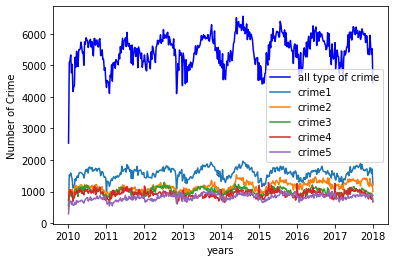

In [11]:
from matplotlib import pyplot as plt

x1 = list(energy111)

x2=list(energy112)
x3=list(energy113)
x4=list(energy114)
x5=list(energy115)
x6=list(energy116)
y=energy111.index

fig, ax = plt.subplots()

ax.plot(y, x1, label='all type of crime', color='blue')
ax.plot(y, x2, label='crime1')
ax.plot(y, x3, label='crime2')
ax.plot(y, x4, label='crime3')
ax.plot(y, x5, label='crime4')
ax.plot(y, x6, label='crime5')
legend = ax.legend()
plt.xlabel('years')
plt.ylabel('Number of Crime')
#plt.title('Comparison of the different region')
plt.show()

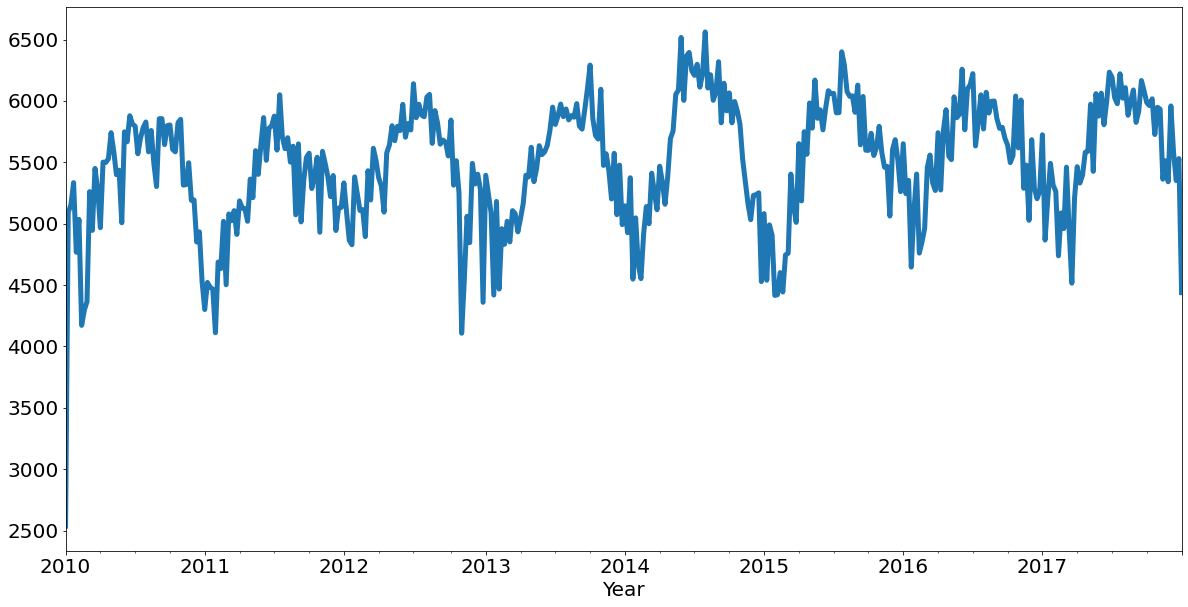

In [12]:
energy111.plot(figsize=(20,10), linewidth=5, fontsize=20,)
plt.xlabel('Year', fontsize=20);


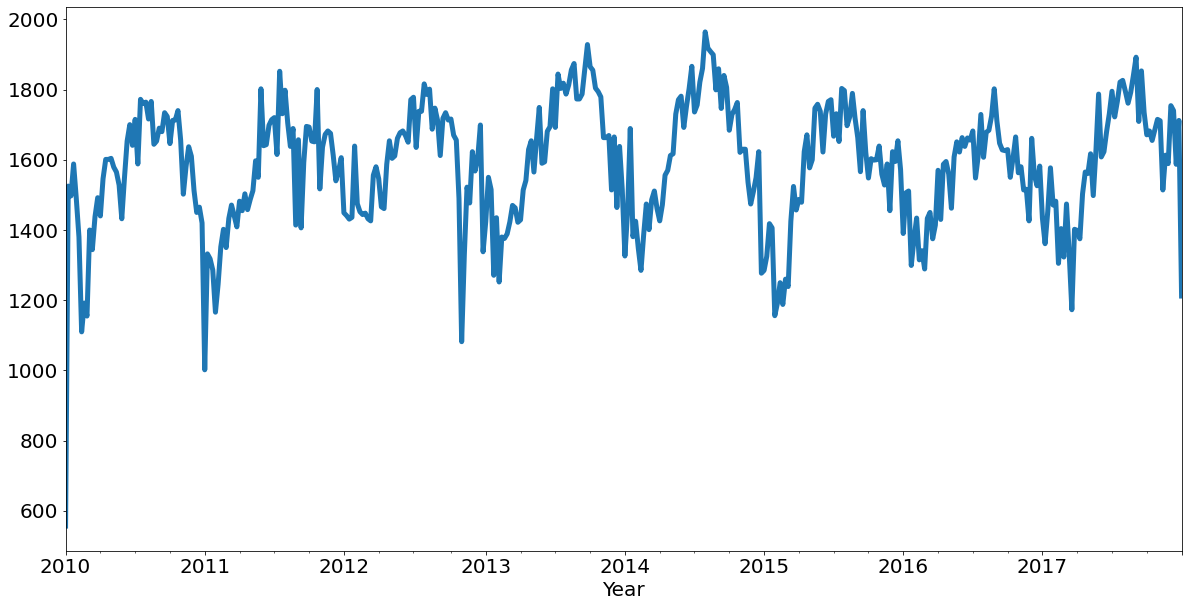

In [13]:
energy112.plot(figsize=(20,10), linewidth=5, fontsize=20,)
plt.xlabel('Year', fontsize=20);


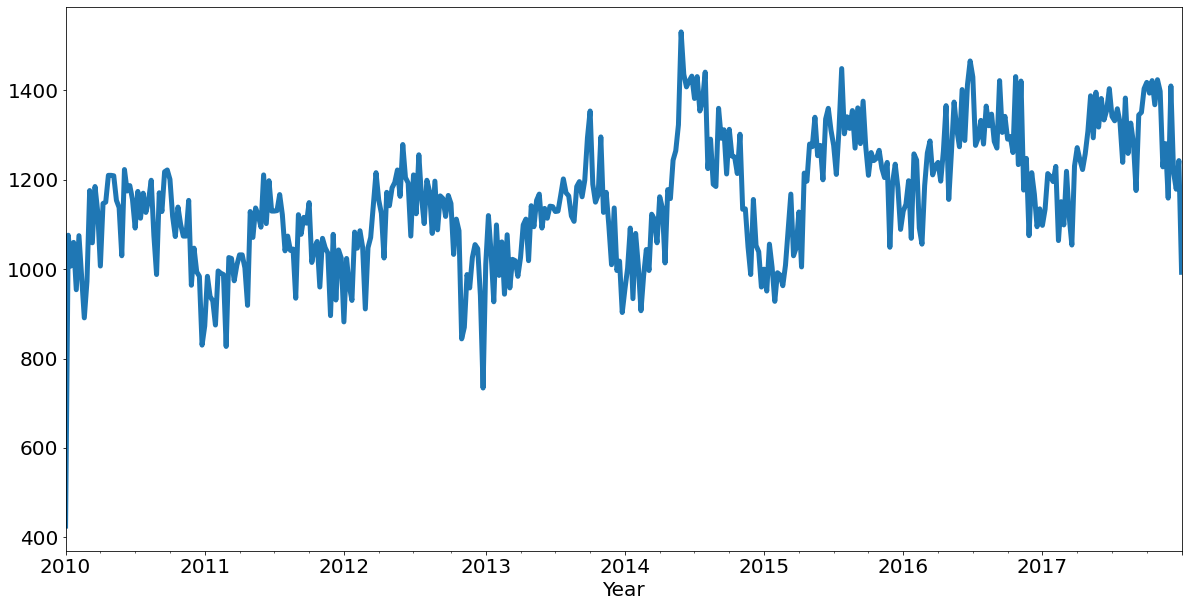

In [14]:
energy113.plot(figsize=(20,10), linewidth=5, fontsize=20,)
plt.xlabel('Year', fontsize=20);


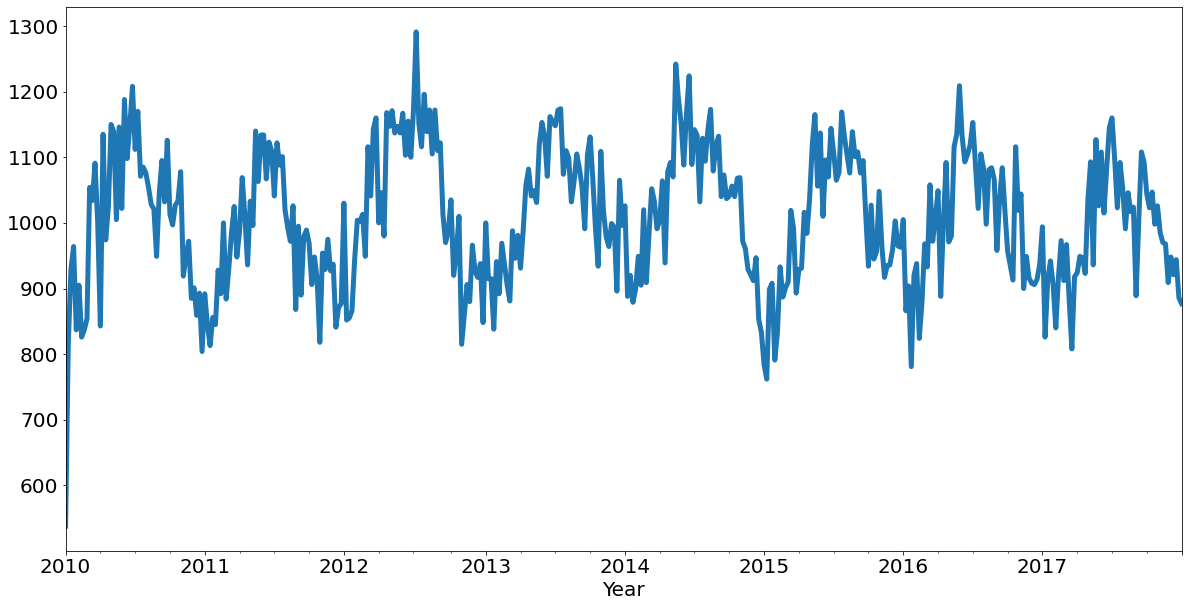

In [15]:
energy114.plot(figsize=(20,10), linewidth=5, fontsize=20,)
plt.xlabel('Year', fontsize=20);

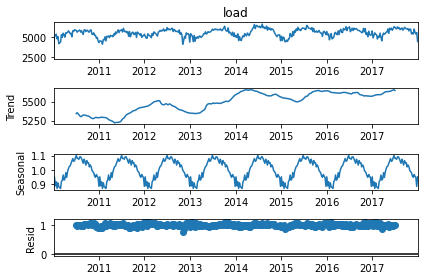

In [16]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(energy111, model='multiplicative')
result.plot()
pyplot.show()

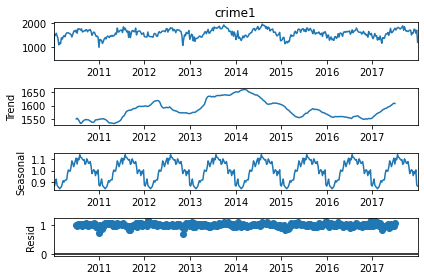

In [17]:
result = seasonal_decompose(energy112, model='multiplicative')
result.plot()
pyplot.show()

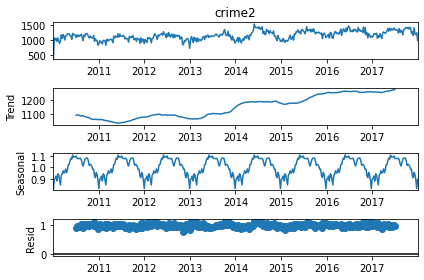

In [18]:
result = seasonal_decompose(energy113, model='multiplicative')
result.plot()
pyplot.show()

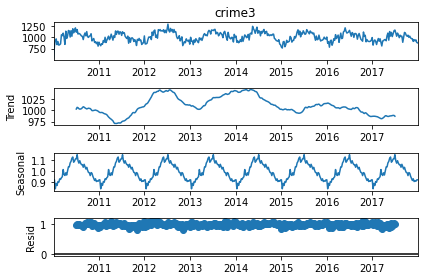

In [19]:
result = seasonal_decompose(energy114, model='multiplicative')
result.plot()
pyplot.show()

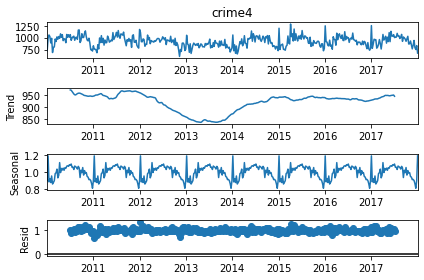

In [23]:
result = seasonal_decompose(energy115, model='multiplicative')
result.plot()
pyplot.show()